Missing Values in Each Column:
 Title                         0
Distributor                   0
ReleaseDateUS                 0
Budget                        0
OpeningWeekendNorthAmerica    0
NorthAmerica                  0
OtherTerritories              0
Worldwide                     0
dtype: int64
Are there any duplicate rows? 0
Descriptive Statistics:
              Budget  OpeningWeekendNorthAmerica  NorthAmerica  \
count  6.400000e+01                6.400000e+01  6.400000e+01   
mean   1.481562e+08                9.014824e+07  2.470271e+08   
std    7.053969e+07                6.741286e+07  1.845656e+08   
min    0.000000e+00                1.500000e+06  1.521787e+06   
25%    1.000000e+08                5.413204e+07  1.324575e+08   
50%    1.500000e+08                8.269390e+07  2.135329e+08   
75%    2.000000e+08                1.153900e+08  3.334327e+08   
max    3.560000e+08                3.571150e+08  8.583730e+08   

       OtherTerritories     Worldwide  
count      6.400

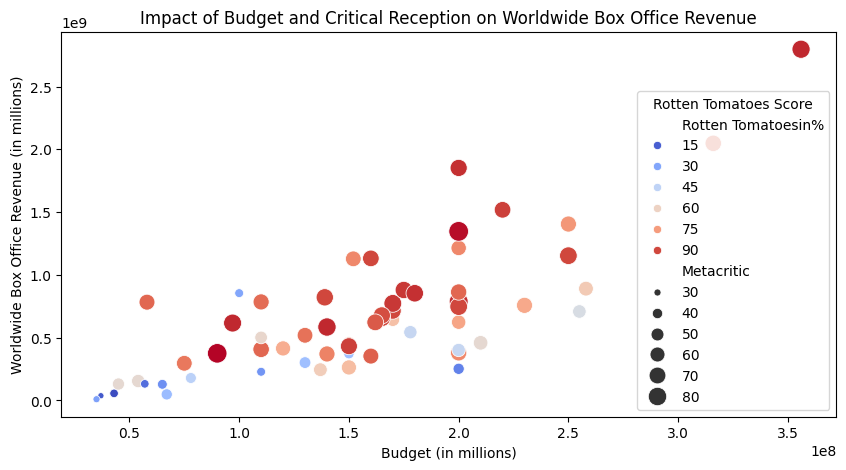

Correlation Matrix:
                       Budget  Worldwide  Rotten Tomatoesin%  Metacritic
Budget              1.000000   0.754450            0.448228    0.501873
Worldwide           0.754450   1.000000            0.555098    0.552248
Rotten Tomatoesin%  0.448228   0.555098            1.000000    0.956551
Metacritic          0.501873   0.552248            0.956551    1.000000


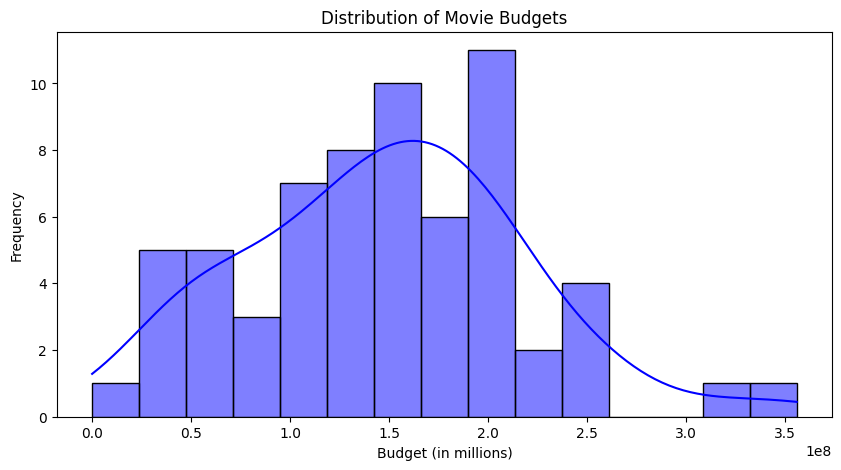

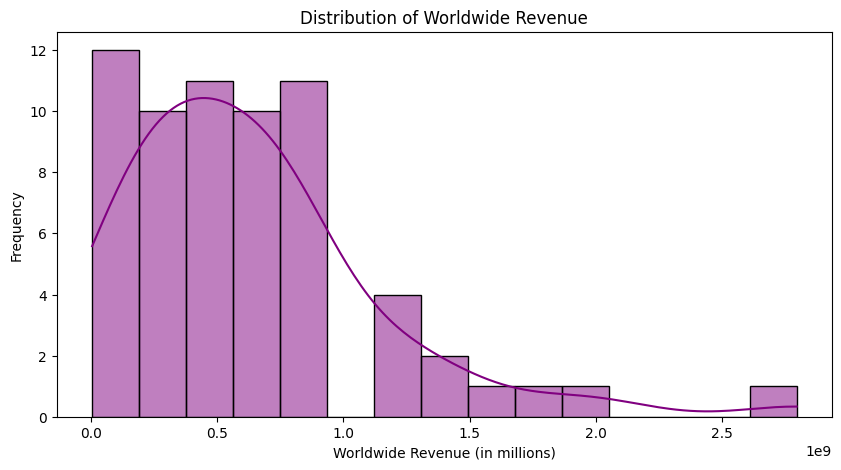

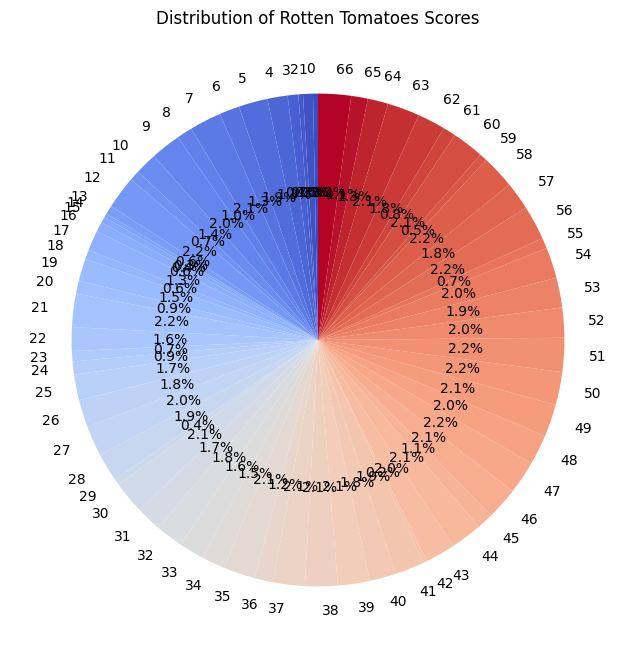

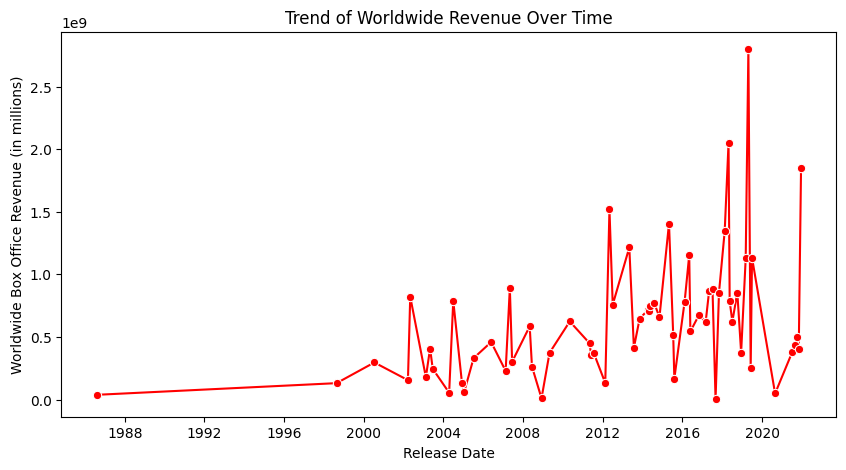

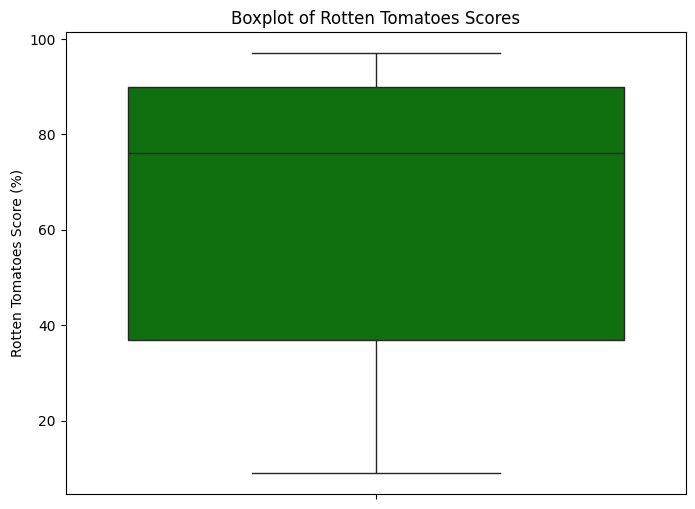

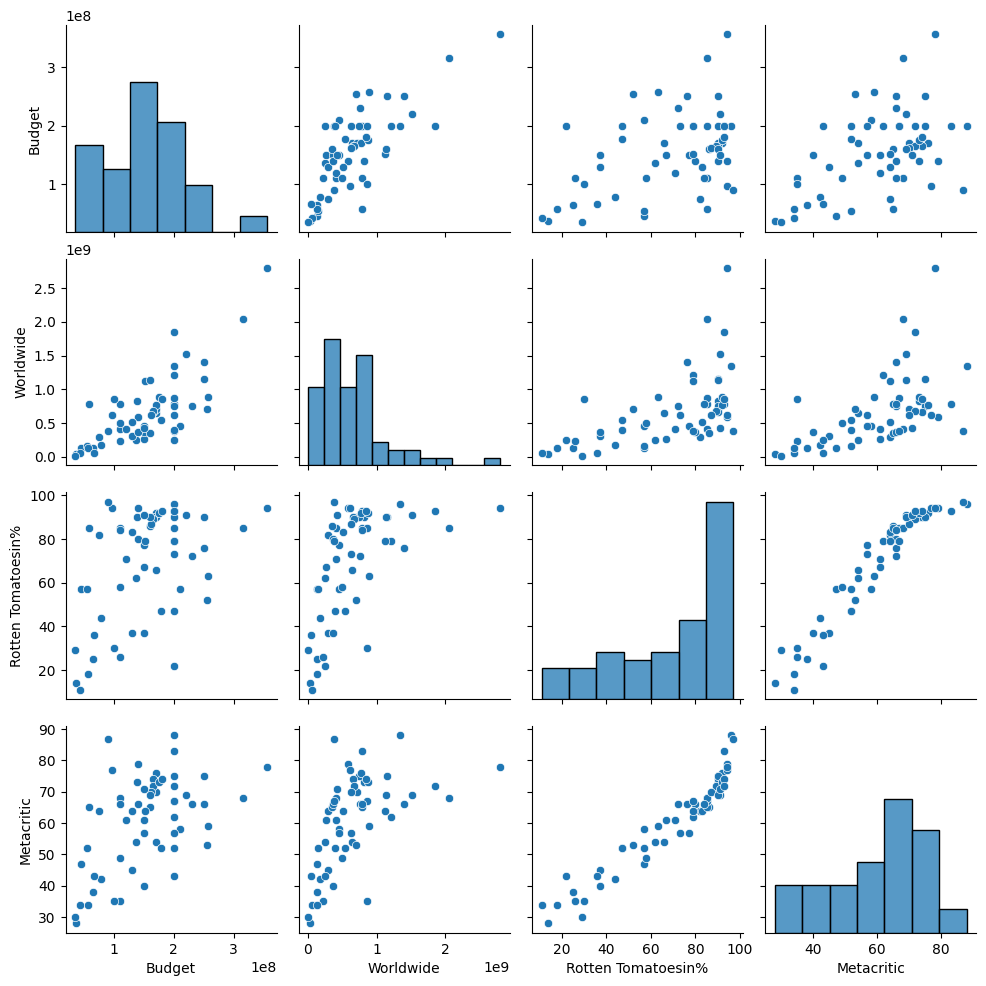

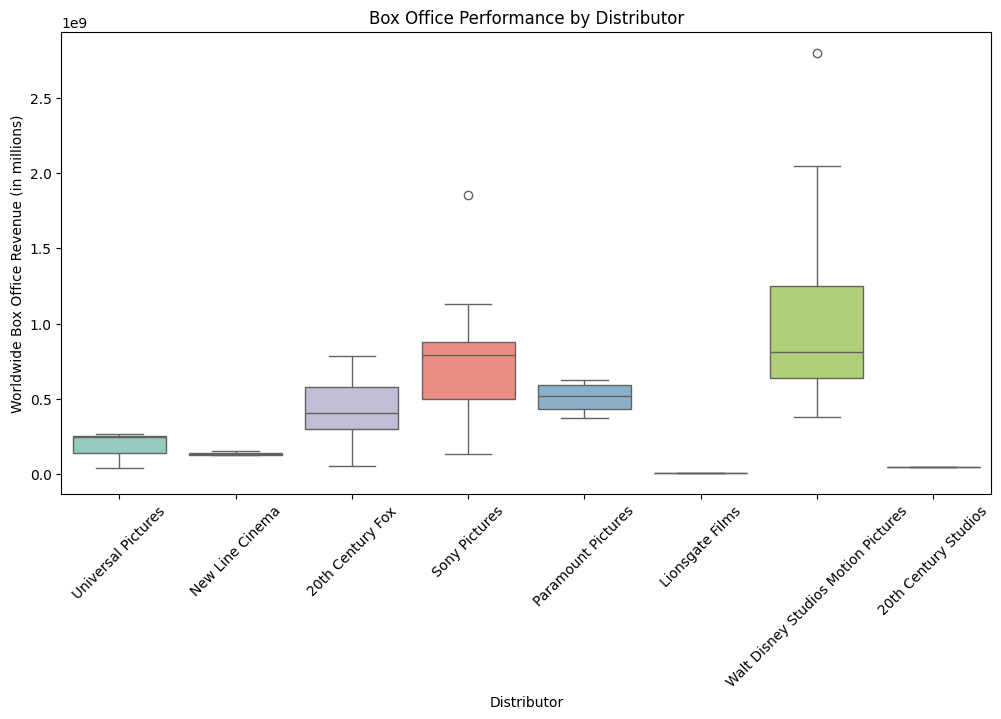

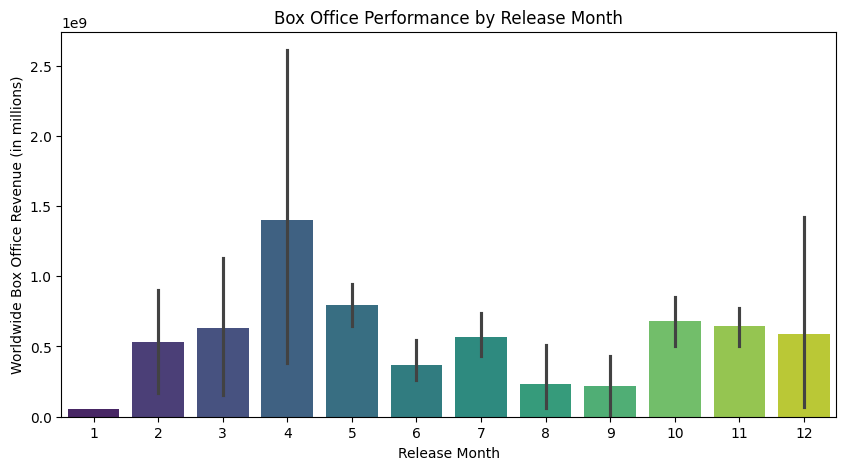

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")  # Hide all warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

# Problem Statement:
# Marvel Studios has produced numerous films with varying levels of success in terms of box office performance and critical reception.
# The goal is to analyze trends in box office performance, critical reception, and other factors to propose strategies for future films.

# Proposed Solution:
# 1. Analyze the relationship between budget, critical reception, and box office performance.
# 2. Identify trends in box office performance over time.
# 3. Determine which factors (e.g., distributor, release date) contribute most to a film's success.
# 4. Propose data-driven strategies for future Marvel films.

# Load datasets
marvel_clean_df = pd.read_csv("marvel_clean.csv")
marvel_reviews_clean_df = pd.read_csv("marvel_reviews_clean.csv")

# Convert necessary columns to numeric
df = marvel_clean_df.copy()
df["Budget"] = pd.to_numeric(df["Budget"], errors='coerce')
df["Worldwide"] = pd.to_numeric(df["Worldwide"], errors='coerce')

# Check for missing values and duplicates
print("Missing Values in Each Column:\n", df.isna().sum())
print("Are there any duplicate rows?", df.duplicated().sum())

# Descriptive statistics
print("Descriptive Statistics:\n", df.describe())

# Merge with reviews
df_reviews = marvel_reviews_clean_df.copy()
df_reviews["Rotten Tomatoesin%"] = pd.to_numeric(df_reviews["Rotten Tomatoesin%"], errors='coerce')
df_reviews["Metacritic"] = pd.to_numeric(df_reviews["Metacritic"], errors='coerce')
merged_df = pd.merge(df, df_reviews, left_on="Title", right_on="Film", how="inner")

# 1. Budget vs. Worldwide Box Office Revenue (with critical reception as hue)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=merged_df["Budget"], y=merged_df["Worldwide"], hue=merged_df["Rotten Tomatoesin%"], palette="coolwarm", size=merged_df["Metacritic"], sizes=(20, 200))
plt.xlabel("Budget (in millions)")
plt.ylabel("Worldwide Box Office Revenue (in millions)")
plt.title("Impact of Budget and Critical Reception on Worldwide Box Office Revenue")
plt.legend(title="Rotten Tomatoes Score")
plt.show()

# 2. Correlation analysis between key variables
correlation_matrix = merged_df[["Budget", "Worldwide", "Rotten Tomatoesin%", "Metacritic"]].corr()
print("Correlation Matrix:\n", correlation_matrix)

# 3. Handle missing values using NumPy
merged_df.fillna(np.nan, inplace=True)

# 4. Histogram of Budget Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Budget"], bins=15, kde=True, color='blue')
plt.xlabel("Budget (in millions)")
plt.ylabel("Frequency")
plt.title("Distribution of Movie Budgets")
plt.show()

# 5. Histogram of Worldwide Revenue
plt.figure(figsize=(10, 5))
sns.histplot(df["Worldwide"], bins=15, kde=True, color='purple')
plt.xlabel("Worldwide Revenue (in millions)")
plt.ylabel("Frequency")
plt.title("Distribution of Worldwide Revenue")
plt.show()

# 6. Pie Chart of Rotten Tomatoes Score Distribution
plt.figure(figsize=(8, 8))
df_reviews["Rotten Tomatoesin%"].plot.pie(autopct="%1.1f%%", cmap='coolwarm', startangle=90)
plt.title("Distribution of Rotten Tomatoes Scores")
plt.ylabel("")
plt.show()

# 7. Line Graph: Budget vs. Revenue Trend Over Time
df["ReleaseDateUS"] = pd.to_datetime(df["ReleaseDateUS"])
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["ReleaseDateUS"], y=df["Worldwide"], marker='o', color='red')
plt.xlabel("Release Date")
plt.ylabel("Worldwide Box Office Revenue (in millions)")
plt.title("Trend of Worldwide Revenue Over Time")
plt.show()

# 8. Boxplot of Rotten Tomatoes Scores
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_reviews["Rotten Tomatoesin%"], color='green')
plt.ylabel("Rotten Tomatoes Score (%)")
plt.title("Boxplot of Rotten Tomatoes Scores")
plt.show()

# 9. Pairplot for in-depth relationship analysis
sns.pairplot(merged_df[["Budget", "Worldwide", "Rotten Tomatoesin%", "Metacritic"]])
plt.show()

# 10. Distributor Analysis: Box Office Performance by Distributor
plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_df["Distributor"], y=merged_df["Worldwide"], palette="Set3")
plt.xlabel("Distributor")
plt.ylabel("Worldwide Box Office Revenue (in millions)")
plt.title("Box Office Performance by Distributor")
plt.xticks(rotation=45)
plt.show()

# 11. Release Date Analysis: Box Office Performance by Release Month
df["ReleaseMonth"] = df["ReleaseDateUS"].dt.month
plt.figure(figsize=(10, 5))
sns.barplot(x=df["ReleaseMonth"], y=df["Worldwide"], palette="viridis")
plt.xlabel("Release Month")
plt.ylabel("Worldwide Box Office Revenue (in millions)")
plt.title("Box Office Performance by Release Month")
plt.show()

# 12. Generate EDA Report using ydata-profiling
profile = ProfileReport(merged_df, title="Marvel Dataset EDA Report", explorative=True)
profile.to_file("marvel_eda.html")